In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import timeit
import datetime as dt
import datetime
from datetime import timedelta

In [2]:
def qualit(donnees):
    print("nb de lignes x nb de colonnes : ", donnees.shape, ".\n")
    print("% de données manquantes :\n", (donnees.isna().sum() /
          len(donnees) * 100).sort_values(ascending=False), "\n")
    print("nb de lignes dupliquées :", donnees.duplicated().sum(), ".\n")


def summary(df):
    display(df.head())
    print('-'*100)
    display(df.info())
    print('-'*100)
    display(df.describe([0.01, 0.25, 0.50, 0.75, 0.99]))

## Les datasets fournis

### Chargement du fichier de commandes sous la nomination 'orders'

In [3]:
orders = pd.read_csv('olist_orders_dataset.csv',
                     delimiter=',', encoding="utf8")
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [4]:
qualit(orders)

nb de lignes x nb de colonnes :  (99441, 8) .

% de données manquantes :
 order_delivered_customer_date    2.981668
order_delivered_carrier_date     1.793023
order_approved_at                0.160899
order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_estimated_delivery_date    0.000000
dtype: float64 

nb de lignes dupliquées : 0 .



In [5]:
orders.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

### Chargement du fichier de contenu des commandes sous la nomination 'order_items' (commandes détaillées)

In [6]:
order_items = pd.read_csv('olist_order_items_dataset.csv',
                          delimiter=',', encoding="utf8")
print(order_items.shape)
order_items.head()

(112650, 7)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
order_items.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

### Chargement du fichier clients sous la nomination 'customers'

In [8]:
customers = pd.read_csv('olist_customers_dataset.csv',
                        delimiter=',', encoding="utf8")
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [9]:
# Un client a un customer_id par commande, alors qu'il n'obtient qu'un seul customer_unique_id dans la base de données
qualit(customers)

nb de lignes x nb de colonnes :  (99441, 5) .

% de données manquantes :
 customer_id                 0.0
customer_unique_id          0.0
customer_zip_code_prefix    0.0
customer_city               0.0
customer_state              0.0
dtype: float64 

nb de lignes dupliquées : 0 .



#### il existe 2 references client pour chaque client, customer_id n'a aucun doublon

In [10]:
customers.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

#### on peut supposer que puisque customer_unique_id peut avoir plusieurs customer_id , il s'agit du veritable id client ,l'autre etant généré a chaque commande 

In [11]:
customers[customers.customer_unique_id.duplicated(
    keep=False)].sort_values(by='customer_unique_id')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
35608,24b0e2bd287e47d54d193e7bbb51103f,00172711b30d52eea8b313a7f2cced02,45200,jequie,BA
19299,1afe8a9c67eec3516c09a8bdcc539090,00172711b30d52eea8b313a7f2cced02,45200,jequie,BA
20023,1b4a75b3478138e99902678254b260f4,004288347e5e88a27ded2bb23747066c,26220,nova iguacu,RJ
22066,f6efe5d5c7b85e12355f9d5c3db46da2,004288347e5e88a27ded2bb23747066c,26220,nova iguacu,RJ
72451,49cf243e0d353cd418ca77868e24a670,004b45ec5c64187465168251cd1c9c2f,57055,maceio,AL
...,...,...,...,...,...
75057,1ae563fdfa500d150be6578066d83998,ff922bdd6bafcdf99cb90d7f39cea5b3,17340,barra bonita,SP
27992,bec0bf00ac5bee64ce8ef5283051a70c,ff922bdd6bafcdf99cb90d7f39cea5b3,17340,barra bonita,SP
79859,d064be88116eb8b958727aec4cf56a59,ff922bdd6bafcdf99cb90d7f39cea5b3,17340,barra bonita,SP
64323,4b231c90751c27521f7ee27ed2dc3b8f,ffe254cc039740e17dd15a5305035928,37640,extrema,MG


### Chargement du fichier contenant les appréciations des clients (scores et commentaires) sous la nomination 'reviews'

In [12]:
reviews = pd.read_csv('olist_order_reviews_dataset.csv',
                      delimiter=',', encoding="utf8")
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [13]:
qualit(reviews)

nb de lignes x nb de colonnes :  (99224, 7) .

% de données manquantes :
 review_comment_title       88.341530
review_comment_message     58.702532
review_id                   0.000000
order_id                    0.000000
review_score                0.000000
review_creation_date        0.000000
review_answer_timestamp     0.000000
dtype: float64 

nb de lignes dupliquées : 0 .



In [14]:
reviews.nunique()

review_id                  98410
order_id                   98673
review_score                   5
review_comment_title        4527
review_comment_message     36159
review_creation_date         636
review_answer_timestamp    98248
dtype: int64

In [15]:
print(reviews.shape)
reviews[reviews.review_id.duplicated(keep=False)].sort_values(by='order_id')
# Affichage des doublons review_id

(99224, 7)


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
22423,2a74b0559eb58fc1ff842ecc999594cb,0035246a40f520710769010f752e7507,5,NaN,Estou acostumada a comprar produtos pelo barat...,2017-08-25 00:00:00,2017-08-29 21:45:57
7629,0501aab2f381486c36bf0f071442c0c2,0068c109948b9a1dfb8530d1978acef3,1,NaN,Espero obter uma resposta para minha encomenda...,2018-02-09 00:00:00,2018-02-10 23:55:18
33124,a555fec0a2d54ccb104762e54f058603,00a250dbdb3153cc6ecf4d3f07ef6a17,2,NaN,"Fiz um pedido de 4 itens, ele foi separado em ...",2017-12-17 00:00:00,2017-12-17 18:25:11
78935,17939259ccc419f355fb4a148151fb00,00d94e8901b75ee0d6ef1f87f947b666,4,NaN,NaN,2017-05-24 00:00:00,2017-05-26 18:54:13
30797,32e2c7e889f7a185d462265398ee3631,00d9ac423c9ad6781c0ed04e87666691,5,NaN,NaN,2017-10-21 00:00:00,2017-10-22 00:47:25
...,...,...,...,...,...,...,...
5500,1a6be4c794d5e3da242a364f6a98163f,ff536d93ae4214b4d51c2894ccfc569f,3,NaN,Chigling,2017-12-28 00:00:00,2017-12-28 22:54:59
27465,5e78482ee783451be6026e5cf0c72de1,ff763b73e473d03c321bcd5a053316e8,3,NaN,Não sei que haverá acontecido os demais chegaram,2017-11-18 00:00:00,2017-11-18 09:02:48
94504,c56a88a404315a0d9e412c1472dda2c4,ff763b73e473d03c321bcd5a053316e8,5,NaN,NaN,2017-11-01 00:00:00,2017-11-01 19:55:52
53962,5476dd0eaee7c4e2725cafb011aa758c,ffaabba06c9d293a3c614e0515ddbabc,3,NaN,NaN,2017-12-20 00:00:00,2017-12-21 13:24:55


### Chargement du fichier contenant les caracteristiques de chaque produit sous la nomination 'products'

In [16]:
products = pd.read_csv('olist_products_dataset.csv',
                       delimiter=',', encoding="utf8")
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [17]:
qualit(products)

nb de lignes x nb de colonnes :  (32951, 9) .

% de données manquantes :
 product_category_name         1.851234
product_name_lenght           1.851234
product_description_lenght    1.851234
product_photos_qty            1.851234
product_weight_g              0.006070
product_length_cm             0.006070
product_height_cm             0.006070
product_width_cm              0.006070
product_id                    0.000000
dtype: float64 

nb de lignes dupliquées : 0 .



In [18]:
products[products['product_category_name'].isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


### Chargement du fichier contenant la traduction potuguais vers anglais de chaque catégories de produits sous la nomination 'cat_translation'

In [19]:
cat_translation = pd.read_csv(
    'product_category_name_translation.csv', delimiter=',', encoding="utf8")
print(cat_translation.shape)
cat_translation.head()

(71, 2)


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### Chargement du fichier contenant les informations de paiement de chaque commande sous la nomination 'order_payments'

In [20]:
order_payments = pd.read_csv(
    'olist_order_payments_dataset.csv', delimiter=',', encoding="utf8")
print(order_payments.shape)
order_payments.head()

(103886, 5)


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [21]:
order_payments.nunique()

order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64

### Création d'un dataset 'order_items' regroupant tous les datasets

#### Création de 'products_e' qui va ajouter la colonne de la categorie de produit en anglais aux informations relatives aux produits

In [22]:
products_e = pd.merge(products, cat_translation,
                      how='left', on='product_category_name')
products_e.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [23]:
qualit(products_e)

nb de lignes x nb de colonnes :  (32951, 10) .

% de données manquantes :
 product_category_name_english    1.890686
product_category_name            1.851234
product_name_lenght              1.851234
product_description_lenght       1.851234
product_photos_qty               1.851234
product_weight_g                 0.006070
product_length_cm                0.006070
product_height_cm                0.006070
product_width_cm                 0.006070
product_id                       0.000000
dtype: float64 

nb de lignes dupliquées : 0 .



### catégories de produits non traduits

In [24]:
products_e[products_e['product_category_name_english'].isna(
)]['product_category_name'].value_counts()
# portateis_cozinha_e_preparadores_de_alimentos = kitchen_and_food_preparadores_portables, traduit par "take away food"
# pc_gamer ..traduit par "pc_gamer"

portateis_cozinha_e_preparadores_de_alimentos    10
pc_gamer                                          3
Name: product_category_name, dtype: int64

### ajout de la traduction aux catégories de produits non traduits

In [25]:
products_e['product_category_name_english'] = np.where(
    products_e['product_category_name'] == 'portateis_cozinha_e_preparadores_de_alimentos', "take away food", products_e['product_category_name_english'])
products_e['product_category_name_english'] = np.where(
    products_e['product_category_name'] == 'pc_gamer', "pc_gamer", products_e['product_category_name_english'])

In [26]:
qualit(products_e)

nb de lignes x nb de colonnes :  (32951, 10) .

% de données manquantes :
 product_category_name            1.851234
product_name_lenght              1.851234
product_description_lenght       1.851234
product_photos_qty               1.851234
product_category_name_english    1.851234
product_weight_g                 0.006070
product_length_cm                0.006070
product_height_cm                0.006070
product_width_cm                 0.006070
product_id                       0.000000
dtype: float64 

nb de lignes dupliquées : 0 .



In [27]:
products_e = products_e[['product_id', 'product_category_name_english']]
products_e

,product_id,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,art
2,96bd76ec8810374ed1b65e291975717f,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,baby
4,9dc1a7de274444849c219cff195d0b71,housewares
...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,furniture_decor
32947,bf4538d88321d0fd4412a93c974510e6,construction_tools_lights
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,bed_bath_table
32949,83808703fc0706a22e264b9d75f04a2e,computers_accessories


### Creation du dataset de commandes detailées

#### Ajout de la colonne de categorie de produits en anglais au dataset de commande detaillée 'order_items'

In [28]:
order_items = pd.merge(order_items, products_e, how='left', on='product_id')
qualit(order_items)

nb de lignes x nb de colonnes :  (112650, 8) .

% de données manquantes :
 product_category_name_english    1.422992
order_id                         0.000000
order_item_id                    0.000000
product_id                       0.000000
seller_id                        0.000000
shipping_limit_date              0.000000
price                            0.000000
freight_value                    0.000000
dtype: float64 

nb de lignes dupliquées : 0 .



#### commandes dont les produits n'ont pas de nom de categorie

In [29]:
order_items[order_items['product_category_name_english'].isna()]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english
123,0046e1d57f4c07c8c92ab26be8c3dfc0,1,ff6caf9340512b8bf6d2a2a6df032cfa,38e6dada03429a47197d5d584d793b41,2017-10-02 15:49:17,7.79,7.78,NaN
125,00482f2670787292280e0a8153d82467,1,a9c404971d1a5b1cbc2e4070e02731fd,702835e4b785b67a084280efca355756,2017-02-17 16:18:07,7.60,10.96,NaN
132,004f5d8f238e8908e6864b874eda3391,1,5a848e4ab52fd5445cdc07aab1c40e48,c826c40d7b19f62a09e2d7c5e7295ee2,2018-03-06 09:29:25,122.99,15.61,NaN
142,0057199db02d1a5ef41bacbf41f8f63b,1,41eee23c25f7a574dfaf8d5c151dbb12,e5a3438891c0bfdb9394643f95273d8e,2018-01-25 09:07:51,20.30,16.79,NaN
171,006cb7cafc99b29548d4f412c7f9f493,1,e10758160da97891c2fdcbc35f0f031d,323ce52b5b81df2cd804b017b7f09aa7,2018-02-22 13:35:28,56.00,14.14,NaN
...,...,...,...,...,...,...,...,...
112306,ff24fec69b7f3d30f9dc1ab3aee7c179,1,5a848e4ab52fd5445cdc07aab1c40e48,c826c40d7b19f62a09e2d7c5e7295ee2,2018-02-01 02:40:12,122.99,15.61,NaN
112333,ff3024474be86400847879103757d1fd,1,f9b1795281ce51b1cf39ef6d101ae8ab,3771c85bac139d2344864ede5d9341e3,2017-11-21 03:55:39,39.90,9.94,NaN
112350,ff3a45ee744a7c1f8096d2e72c1a23e4,1,b61d1388a17e3f547d2bc218df02335b,07017df32dc5f2f1d2801e579548d620,2017-05-10 10:15:19,139.00,21.42,NaN
112438,ff7b636282b98e0aa524264b295ed928,1,431df35e52c10451171d8037482eeb43,6cd68b3ed6d59aaa9fece558ad360c0a,2018-02-22 15:35:35,49.90,15.11,NaN


In [30]:
##### order_items = order_items.dropna(subset=['product_category_name_english'])
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools


In [31]:
qualit(order_items)

nb de lignes x nb de colonnes :  (112650, 8) .

% de données manquantes :
 product_category_name_english    1.422992
order_id                         0.000000
order_item_id                    0.000000
product_id                       0.000000
seller_id                        0.000000
shipping_limit_date              0.000000
price                            0.000000
freight_value                    0.000000
dtype: float64 

nb de lignes dupliquées : 0 .



#### Ajout des informations de commande au dataset 'order_items'

In [32]:
order_items = pd.merge(order_items, orders, how='left', on='order_id')
qualit(order_items)

nb de lignes x nb de colonnes :  (112650, 15) .

% de données manquantes :
 order_delivered_customer_date    2.178429
product_category_name_english    1.422992
order_delivered_carrier_date     1.059920
order_approved_at                0.013316
order_id                         0.000000
order_item_id                    0.000000
product_id                       0.000000
seller_id                        0.000000
shipping_limit_date              0.000000
price                            0.000000
freight_value                    0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_estimated_delivery_date    0.000000
dtype: float64 

nb de lignes dupliquées : 0 .



In [33]:
order_items.order_status.value_counts()

delivered      110197
shipped          1185
canceled          542
invoiced          359
processing        357
unavailable         7
approved            3
Name: order_status, dtype: int64

#### On ne conserve que les commandes livrées

In [34]:
order_items = order_items[order_items.order_status == 'delivered']
qualit(order_items)

nb de lignes x nb de colonnes :  (110197, 15) .

% de données manquantes :
 product_category_name_english    1.394775
order_approved_at                0.013612
order_delivered_customer_date    0.007260
order_delivered_carrier_date     0.001815
order_id                         0.000000
order_item_id                    0.000000
product_id                       0.000000
seller_id                        0.000000
shipping_limit_date              0.000000
price                            0.000000
freight_value                    0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_estimated_delivery_date    0.000000
dtype: float64 

nb de lignes dupliquées : 0 .



#### Ajout des informations clients au dataset 'order_items'

In [35]:
order_items = pd.merge(order_items, customers, how='left', on='customer_id')
qualit(order_items)

nb de lignes x nb de colonnes :  (110197, 19) .

% de données manquantes :
 product_category_name_english    1.394775
order_approved_at                0.013612
order_delivered_customer_date    0.007260
order_delivered_carrier_date     0.001815
order_id                         0.000000
order_purchase_timestamp         0.000000
customer_city                    0.000000
customer_zip_code_prefix         0.000000
customer_unique_id               0.000000
order_estimated_delivery_date    0.000000
order_status                     0.000000
order_item_id                    0.000000
customer_id                      0.000000
freight_value                    0.000000
price                            0.000000
shipping_limit_date              0.000000
seller_id                        0.000000
product_id                       0.000000
customer_state                   0.000000
dtype: float64 

nb de lignes dupliquées : 0 .



#### Ajout des informations de type de paiement au dataset 'order_items'

In [36]:
order_items = pd.merge(order_items, order_payments, how='left', on='order_id')
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english,customer_id,order_status,...,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,3ce436f183e68e07877b285a838db11a,delivered,...,2017-09-20 23:43:48,2017-09-29 00:00:00,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,1.0,credit_card,2.0,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,f6dd3ec061db4e3987629fe6b26e5cce,delivered,...,2017-05-12 16:04:24,2017-05-15 00:00:00,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,1.0,credit_card,3.0,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor,6489ae5e4333f3693df5ad4372dab6d3,delivered,...,2018-01-22 13:19:16,2018-02-05 00:00:00,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,1.0,credit_card,5.0,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery,d4eb9395c8c0431ee92fce09860c5a06,delivered,...,2018-08-14 13:32:39,2018-08-20 00:00:00,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,1.0,credit_card,2.0,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools,58dbd0b2d70206bf40e62cd34e84d795,delivered,...,2017-03-01 16:42:31,2017-03-17 00:00:00,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,1.0,credit_card,3.0,218.04


In [37]:
qualit(order_items)

nb de lignes x nb de colonnes :  (115038, 23) .

% de données manquantes :
 product_category_name_english    1.415185
order_approved_at                0.013039
order_delivered_customer_date    0.006954
payment_installments             0.002608
payment_type                     0.002608
payment_sequential               0.002608
payment_value                    0.002608
order_delivered_carrier_date     0.001739
freight_value                    0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_item_id                    0.000000
price                            0.000000
order_estimated_delivery_date    0.000000
customer_unique_id               0.000000
customer_zip_code_prefix         0.000000
customer_city                    0.000000
customer_state                   0.000000
shipping_limit_date              0.000000
seller_id                        0.000000
product_id                       0.000000


#### on remarque le meme nombre de 'order_id' et de 'customer_id'

In [38]:
order_items.nunique()

order_id                         96478
order_item_id                       21
product_id                       32216
seller_id                         2970
shipping_limit_date              91344
price                             5859
freight_value                     6924
product_category_name_english       73
customer_id                      96478
order_status                         1
order_purchase_timestamp         95956
order_approved_at                88274
order_delivered_carrier_date     80106
order_delivered_customer_date    95658
order_estimated_delivery_date      445
customer_unique_id               93358
customer_zip_code_prefix         14889
customer_city                     4085
customer_state                      27
payment_sequential                  26
payment_type                         4
payment_installments                24
payment_value                    28547
dtype: int64

#### Creation de temp2 à partir des reviews afin d'obtenir la note moyenne par commande

In [39]:
# sur une commande sur plusieurs lignes, il arrive qu il y ai des reviw_score differents en fonction du produit.
# comme le montre l'affichage des commandes en plusieurs lignes ci dessous(affichage des doublons)

temp2 = reviews[['order_id', 'review_score']]
print(temp2.shape)

temp2[temp2.order_id.duplicated(keep=False)].sort_values(by='order_id')

(99224, 2)


,order_id,review_score
25612,0035246a40f520710769010f752e7507,5
22423,0035246a40f520710769010f752e7507,5
22779,013056cfe49763c6f66bda03396c5ee3,5
68633,013056cfe49763c6f66bda03396c5ee3,4
854,0176a6846bcb3b0d3aa3116a9a768597,5
...,...,...
27465,ff763b73e473d03c321bcd5a053316e8,3
41355,ff850ba359507b996e8b2fbb26df8d03,5
18783,ff850ba359507b996e8b2fbb26df8d03,5
92230,ffaabba06c9d293a3c614e0515ddbabc,3


#### Retrait des commandes n'ayant pas de review_score

In [40]:
temp2 = reviews.groupby('order_id').mean().reset_index()
temp2 = temp2.dropna(subset=['review_score'])

print(temp2.shape)
temp2.head()

(98673, 2)


,order_id,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,5.0
1,00018f77f2f0320c557190d7a144bdd3,4.0
2,000229ec398224ef6ca0657da4fc703e,5.0
3,00024acbcdf0a6daa1e931b038114c75,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,5.0


#### Ajout de la note moyenne par commande au dataset commandes

In [41]:
order_items = pd.merge(
    order_items, temp2[['order_id', 'review_score']],
    how='left', on='order_id')

order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english,customer_id,order_status,...,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,3ce436f183e68e07877b285a838db11a,delivered,...,2017-09-29 00:00:00,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,1.0,credit_card,2.0,72.19,5.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,f6dd3ec061db4e3987629fe6b26e5cce,delivered,...,2017-05-15 00:00:00,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,1.0,credit_card,3.0,259.83,4.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor,6489ae5e4333f3693df5ad4372dab6d3,delivered,...,2018-02-05 00:00:00,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,1.0,credit_card,5.0,216.87,5.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery,d4eb9395c8c0431ee92fce09860c5a06,delivered,...,2018-08-20 00:00:00,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,1.0,credit_card,2.0,25.78,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools,58dbd0b2d70206bf40e62cd34e84d795,delivered,...,2017-03-17 00:00:00,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,1.0,credit_card,3.0,218.04,5.0


In [42]:
order_items.nunique()

order_id                         96478
order_item_id                       21
product_id                       32216
seller_id                         2970
shipping_limit_date              91344
price                             5859
freight_value                     6924
product_category_name_english       73
customer_id                      96478
order_status                         1
order_purchase_timestamp         95956
order_approved_at                88274
order_delivered_carrier_date     80106
order_delivered_customer_date    95658
order_estimated_delivery_date      445
customer_unique_id               93358
customer_zip_code_prefix         14889
customer_city                     4085
customer_state                      27
payment_sequential                  26
payment_type                         4
payment_installments                24
payment_value                    28547
review_score                        11
dtype: int64

In [43]:
qualit(order_items)

nb de lignes x nb de colonnes :  (115038, 24) .

% de données manquantes :
 product_category_name_english    1.415185
review_score                     0.748448
order_approved_at                0.013039
order_delivered_customer_date    0.006954
payment_value                    0.002608
payment_installments             0.002608
payment_type                     0.002608
payment_sequential               0.002608
order_delivered_carrier_date     0.001739
order_status                     0.000000
order_purchase_timestamp         0.000000
customer_id                      0.000000
order_item_id                    0.000000
freight_value                    0.000000
order_estimated_delivery_date    0.000000
customer_unique_id               0.000000
customer_zip_code_prefix         0.000000
customer_city                    0.000000
customer_state                   0.000000
price                            0.000000
shipping_limit_date              0.000000
seller_id                        0.000000


#### Retrait  des commandes aux 'review_score' manquants du dataset 'order_items' 

In [44]:
order_items = order_items.dropna(subset=['review_score'])

#### dates premiere et derniere commande du fichier

In [45]:
order_items['order_purchase_timestamp'] = pd.to_datetime(
    order_items['order_purchase_timestamp'])

order_items.order_purchase_timestamp.min(
), order_items.order_purchase_timestamp.max()

(Timestamp('2016-09-15 12:16:38'), Timestamp('2018-08-29 15:00:37'))

#### Olist fournit une base de données anonymisée comportant des informations sur l’historique de commandes, les produits achetés, les commentaires de satisfaction, et la localisation des clients depuis janvier 2017.

In [46]:
order_items = order_items[(
    order_items['order_purchase_timestamp'] >= '2017-01-01')]

In [47]:
order_items = order_items.dropna(subset=['review_score'])

#### dates premiere et derniere commande du fichier

In [48]:
order_items['order_purchase_timestamp'] = pd.to_datetime(
    order_items['order_purchase_timestamp'])

order_items.order_purchase_timestamp.min(
), order_items.order_purchase_timestamp.max()

(Timestamp('2017-01-05 11:56:06'), Timestamp('2018-08-29 15:00:37'))

#### Nombres de jours du dataset 

In [49]:
order_items.order_purchase_timestamp.max() - order_items.order_purchase_timestamp.min() 

Timedelta('601 days 03:04:31')

#### Sauvegarde du fichier commandes complet dont une commande peut etre sur plusieurs lignes

In [50]:
order_items.to_csv('order_items_full.csv')

print(order_items.shape)
summary(order_items)

(113847, 24)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english,customer_id,order_status,...,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,3ce436f183e68e07877b285a838db11a,delivered,...,2017-09-29 00:00:00,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,1.0,credit_card,2.0,72.19,5.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,f6dd3ec061db4e3987629fe6b26e5cce,delivered,...,2017-05-15 00:00:00,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP,1.0,credit_card,3.0,259.83,4.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor,6489ae5e4333f3693df5ad4372dab6d3,delivered,...,2018-02-05 00:00:00,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG,1.0,credit_card,5.0,216.87,5.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery,d4eb9395c8c0431ee92fce09860c5a06,delivered,...,2018-08-20 00:00:00,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP,1.0,credit_card,2.0,25.78,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools,58dbd0b2d70206bf40e62cd34e84d795,delivered,...,2017-03-17 00:00:00,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP,1.0,credit_card,3.0,218.04,5.0


----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 113847 entries, 0 to 115037
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113847 non-null  object        
 1   order_item_id                  113847 non-null  int64         
 2   product_id                     113847 non-null  object        
 3   seller_id                      113847 non-null  object        
 4   shipping_limit_date            113847 non-null  object        
 5   price                          113847 non-null  float64       
 6   freight_value                  113847 non-null  float64       
 7   product_category_name_english  112233 non-null  object        
 8   customer_id                    113847 non-null  object        
 9   order_status                   1138

None

----------------------------------------------------------------------------------------------------


,order_item_id,price,freight_value,customer_zip_code_prefix,payment_sequential,payment_installments,payment_value,review_score
count,113847.000000,113847.000000,113847.000000,113847.000000,113847.000000,113847.000000,113847.000000,113847.000000
mean,1.193742,119.929683,19.990055,35073.068829,1.090938,2.931452,171.318231,4.082090
std,0.683500,181.828802,15.735835,29866.759417,0.686794,2.768148,264.396120,1.345038
min,1.000000,0.850000,0.000000,1003.000000,1.000000,0.000000,0.000000,1.000000
1%,1.000000,9.990000,4.440000,1329.000000,1.000000,1.000000,7.479200,1.000000
25%,1.000000,39.900000,13.080000,11250.000000,1.000000,1.000000,60.750000,4.000000
50%,1.000000,74.900000,16.280000,24310.000000,1.000000,2.000000,108.000000,5.000000
75%,1.000000,133.000000,21.165000,58780.000000,1.000000,4.000000,188.660000,5.000000
99%,4.000000,889.000000,84.482400,97574.000000,3.000000,10.000000,1200.000000,5.000000
max,21.000000,6735.000000,409.680000,99980.000000,26.000000,24.000000,13664.080000,5.000000


### Creation et sauvegarde du dataset 'orders_data' avec une une commande (unique) par ligne

In [51]:
orders_data = order_items.groupby('order_id').agg(customer_id=('customer_id', min),
                                                  customer_unique_id=('customer_unique_id', min),
                                                  order_item_id=('order_item_id', len),
                                                  total_price=('price', np.sum),
                                                  review_score=('review_score', np.mean),
                                                  order_purchase_timestamp=('order_purchase_timestamp', max)
                                                  ).reset_index()

In [52]:
qualit(orders_data)

nb de lignes x nb de colonnes :  (95568, 7) .

% de données manquantes :
 order_id                    0.0
customer_id                 0.0
customer_unique_id          0.0
order_item_id               0.0
total_price                 0.0
review_score                0.0
order_purchase_timestamp    0.0
dtype: float64 

nb de lignes dupliquées : 0 .



In [53]:
summary(orders_data)

,order_id,customer_id,customer_unique_id,order_item_id,total_price,review_score,order_purchase_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,1,58.90,5.0,2017-09-13 08:59:02
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,1,239.90,4.0,2017-04-26 10:53:06
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474,1,199.00,5.0,2018-01-14 14:33:31
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,af861d436cfc08b2c2ddefd0ba074622,1,12.99,4.0,2018-08-08 10:00:35
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,64b576fb70d441e8f1b2d7d446e483c5,1,199.90,5.0,2017-02-04 13:57:51


----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95568 entries, 0 to 95567
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  95568 non-null  object        
 1   customer_id               95568 non-null  object        
 2   customer_unique_id        95568 non-null  object        
 3   order_item_id             95568 non-null  int64         
 4   total_price               95568 non-null  float64       
 5   review_score              95568 non-null  float64       
 6   order_purchase_timestamp  95568 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 5.1+ MB


None

----------------------------------------------------------------------------------------------------


,order_item_id,total_price,review_score
count,95568.000000,95568.000000,95568.000000
mean,1.191267,142.868268,4.156608
std,0.729205,235.709673,1.283189
min,1.000000,0.850000,1.000000
1%,1.000000,12.000000,1.000000
25%,1.000000,47.000000,4.000000
50%,1.000000,89.000000,5.000000
75%,1.000000,152.000000,5.000000
99%,4.000000,1054.000000,5.000000
max,63.000000,13440.000000,5.000000


In [54]:
orders_data.to_csv('orders_data.csv')

## Analyse exploratoire

### Création d'une fonction permetant a partir des ventes prétaitees (orders_data) et d'une date afin de creer un dataset d'informations clients à cette date

In [55]:
# le dataset paramétré en entrée est orders_data contenant une commande unique par ligne
# afin de creer un dataset de sortie contenant les variables numeriques relatives a chaque client(index)

def data_sli(date_model='2018-08-30'):
    now = dt.datetime(2018, 8, 30)

    dataset = orders_data[['order_id', 'customer_id', 'customer_unique_id', 'order_item_id', 'total_price', 'review_score',
                           'order_purchase_timestamp']].copy()

    dataset['order_purchase_timestamp'] = pd.to_datetime(
        dataset['order_purchase_timestamp'])

    dataset = dataset[dataset['order_purchase_timestamp'] < date_model]

    dataset = dataset.groupby('customer_unique_id').agg(note_moy=('review_score', np.mean),
                                                        Monetary=('total_price', np.sum),
                                                        qtés=('order_item_id', np.sum),
                                                        Recency=('order_purchase_timestamp', max),
                                                        Frequency=('customer_id', len))
    
    dataset['Recency'] = now - dataset['Recency']
    dataset['Recency'] = dataset['Recency'].dt.days

    return dataset

In [56]:
data = data_sli(date_model='2018-08-30')
print(data.shape)
data.head()

(92504, 5)


,note_moy,Monetary,qtés,Recency,Frequency
customer_unique_id,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,5.0,129.90,1,111,1
0000b849f77a49e4a4ce2b2a4ca5be3f,4.0,18.90,1,114,1
0000f46a3911fa3c0805444483337064,3.0,69.00,1,537,1
0000f6ccb0745a6a4b88665a16c9f078,4.0,25.99,1,321,1
0004aac84e0df4da2b147fca70cf8255,5.0,180.00,1,288,1


In [57]:
data.describe()

,note_moy,Monetary,qtés,Recency,Frequency
count,92504.000000,92504.000000,92504.000000,92504.000000,92504.000000
mean,4.154123,147.600478,1.230725,236.099563,1.033123
std,1.279691,242.754956,0.816245,150.962701,0.208324
min,1.000000,0.850000,1.000000,0.000000,1.000000
25%,4.000000,48.900000,1.000000,114.000000,1.000000
50%,5.000000,89.900000,1.000000,218.000000,1.000000
75%,5.000000,159.770000,1.000000,344.000000,1.000000
max,5.000000,13440.000000,75.000000,601.000000,15.000000


#### Les variables categorielles du dataset complet des commandes

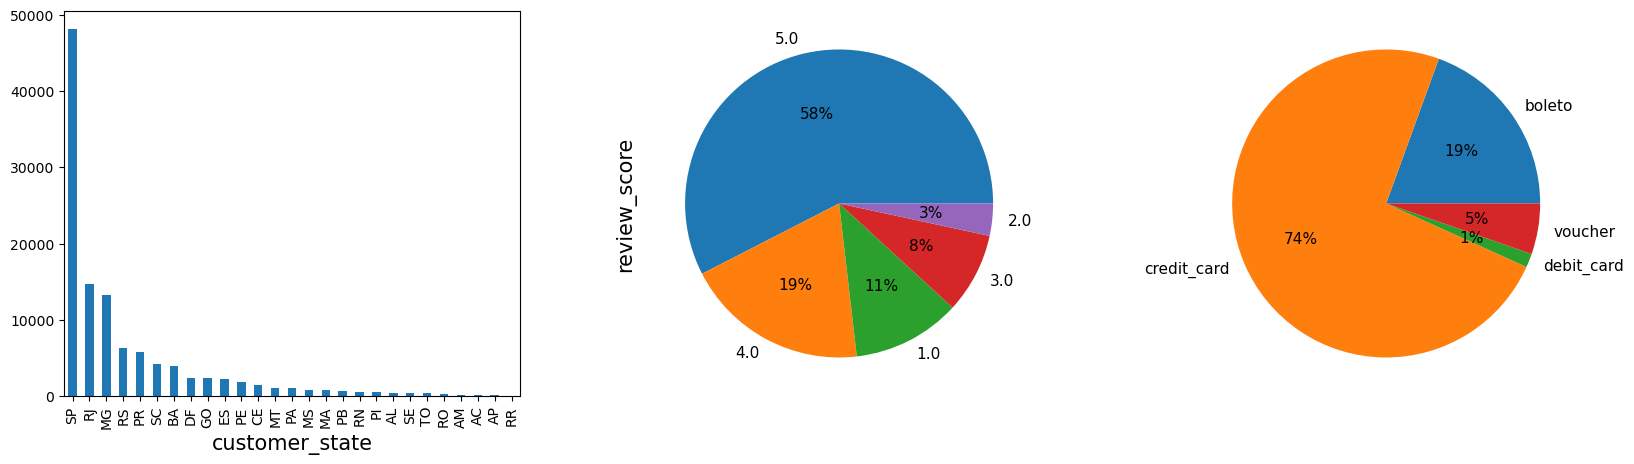

In [58]:
plt.figure(figsize=(20, 5))

plt.subplot(131)
order_items.groupby('customer_state').size().sort_values(
    ascending=False).plot(kind='bar')
plt.xlabel("customer_state", color='k', fontsize=15)
plt.xticks(fontsize=10, color='k')


plt.subplot(132)
order_items.groupby('review_score').size().sort_values(ascending=False)[:2].plot(
    kind='pie', autopct='%1.0f%%', radius=1, rotatelabels=False, textprops={'fontsize': 11})
plt.ylabel('review_score', fontsize=15)

plt.subplot(133)
order_items.groupby('payment_type').size().plot(
    kind='pie', autopct='%1.0f%%', radius=1, rotatelabels=False, textprops={'fontsize': 11})
plt.ylabel('', fontsize=15)


#plt.suptitle('Les variables catégorielles',fontsize = 30)
plt.show()

#### acronymes des états du Brésil
Sao Paulo(SP), Rio de Janeiro (RJ), Minas Gerais (MG), Rio Grande do Sul (RS), Paraná (RP) ?? PR??, Santa Catarina (SC)....

### Les variables numériques du dataset clients généré (data)

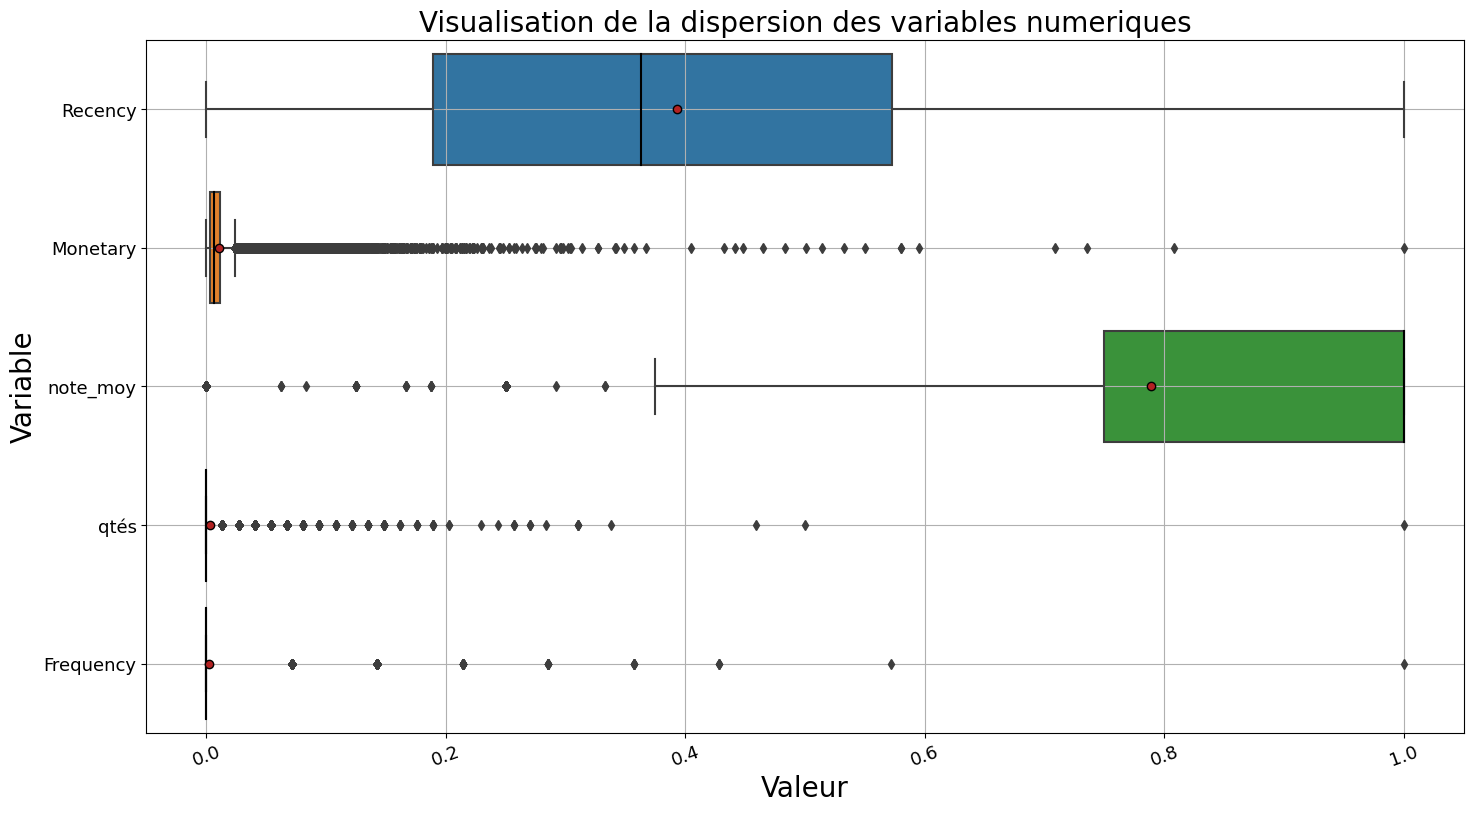

In [59]:
df_num = data.select_dtypes(include=['float64', 'int64']).copy()
df_num_std = (df_num-df_num.min())/(df_num.max()-df_num.min())

temp3 = pd.DataFrame(df_num_std, columns=df_num.select_dtypes(include=['float64', 'int64']).columns.tolist(
), index=df_num.select_dtypes(include=['float64', 'int64']).index.tolist())

temp3 = pd.melt(temp3)

ordre = df_num.select_dtypes(include=['float64', 'int64']).median(
).sort_values(ascending=False).index.tolist()


plt.figure(figsize=(17, 9))

medianprops = {'color': "black"}
meanprops = {'marker': 'o', 'markeredgecolor': 'black',
             'markerfacecolor': 'firebrick'}

sns.boxplot(y="variable", x="value", showfliers=True, medianprops=medianprops,
            order=ordre, showmeans=True, meanprops=meanprops, orient='h', data=temp3)

plt.xticks(fontsize=13, color='k', rotation=20)
plt.yticks(fontsize=13, color='k')

plt.ylabel("Variable", color='k', fontsize=20)
plt.xlabel("Valeur", color='k', fontsize=20)
plt.title("Visualisation de la dispersion des variables numeriques", fontsize=20)

plt.grid(True)
plt.draw()

#### Fréquence du nombre de jours depuis la derniere commande par clients

C:\Users\multi\AppData\Local\Temp\ipykernel_19252\3084677394.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Recency)


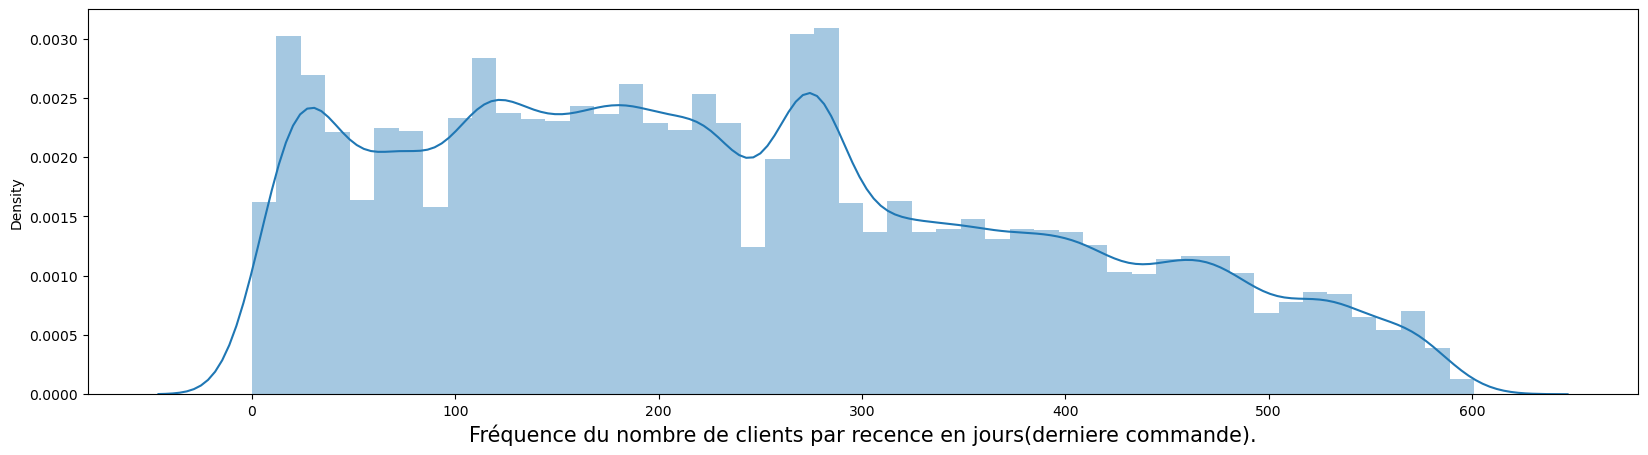

In [72]:
plt.figure(figsize=(20, 5))
sns.distplot(data.Recency)
plt.xlabel("Fréquence du nombre de clients par recence en jours(derniere commande).",
           color='k', fontsize=15)
plt.xticks(fontsize=10, color='k');

#### Fréquence du nombre de commande par clients

C:\Users\multi\AppData\Local\Temp\ipykernel_19252\3664458848.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Frequency)


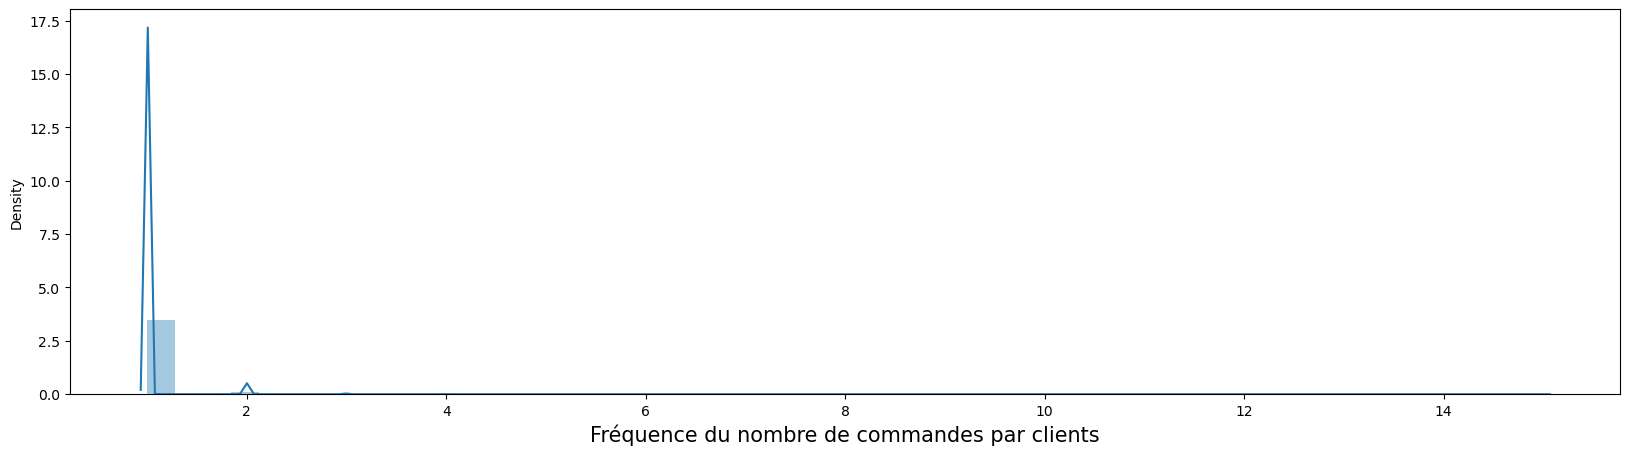

In [73]:
plt.figure(figsize=(20, 5))
sns.distplot(data.Frequency)
plt.xlabel("Fréquence du nombre de commandes par clients",
           color='k', fontsize=15)
plt.xticks(fontsize=10, color='k');

#### Fréquence du montant moyen de commande par client

C:\Users\multi\AppData\Local\Temp\ipykernel_19252\1208908719.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Monetary)


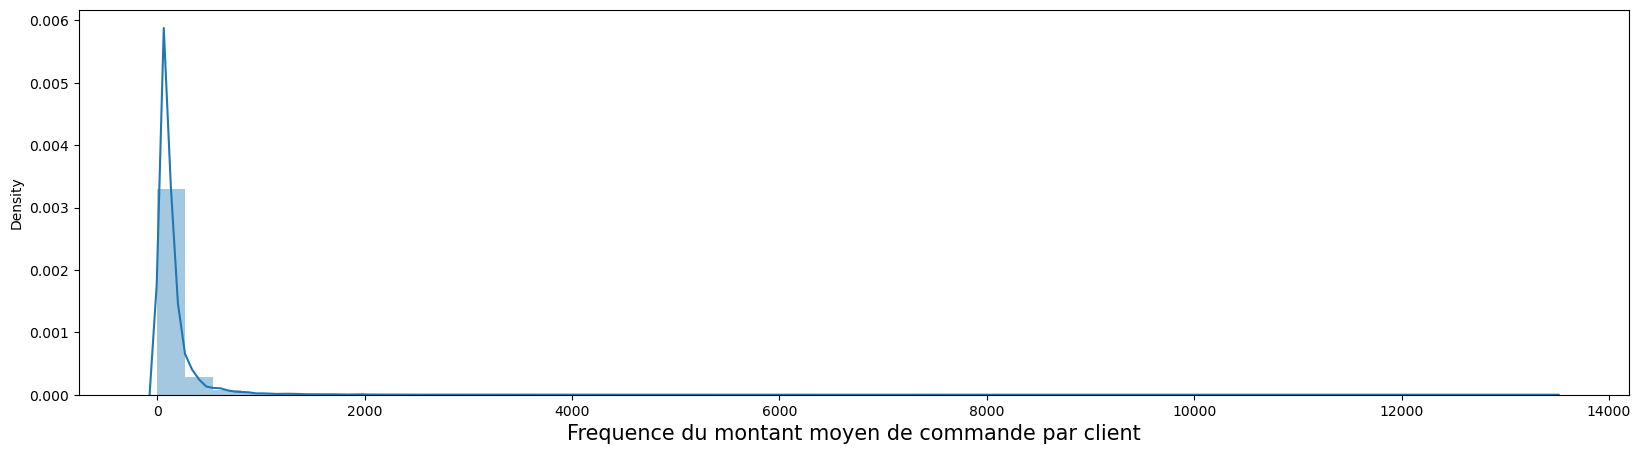

In [74]:
plt.figure(figsize=(20, 5))
sns.distplot(data.Monetary)
plt.xlabel("Frequence du montant moyen de commande par client",
           color='k', fontsize=15)
plt.xticks(fontsize=10, color='k');

#### Fréquence des notes moyennes attribuées par les clients

C:\Users\multi\AppData\Local\Temp\ipykernel_19252\3366875858.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.note_moy)


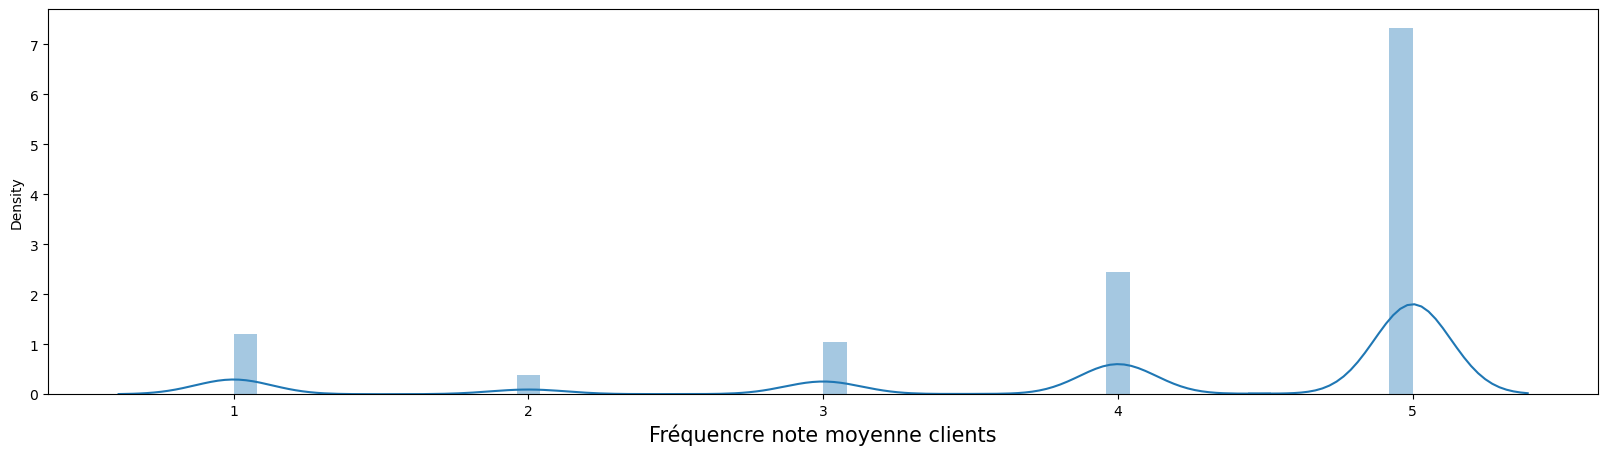

In [75]:
plt.figure(figsize=(20, 5))
sns.distplot(data.note_moy)
plt.xlabel("Fréquencre note moyenne clients", color='k', fontsize=15)
plt.xticks(fontsize=10, color='k');

#### Fréquence des quantités moyennes commandées par client

C:\Users\multi\AppData\Local\Temp\ipykernel_19252\787269805.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.qtés)


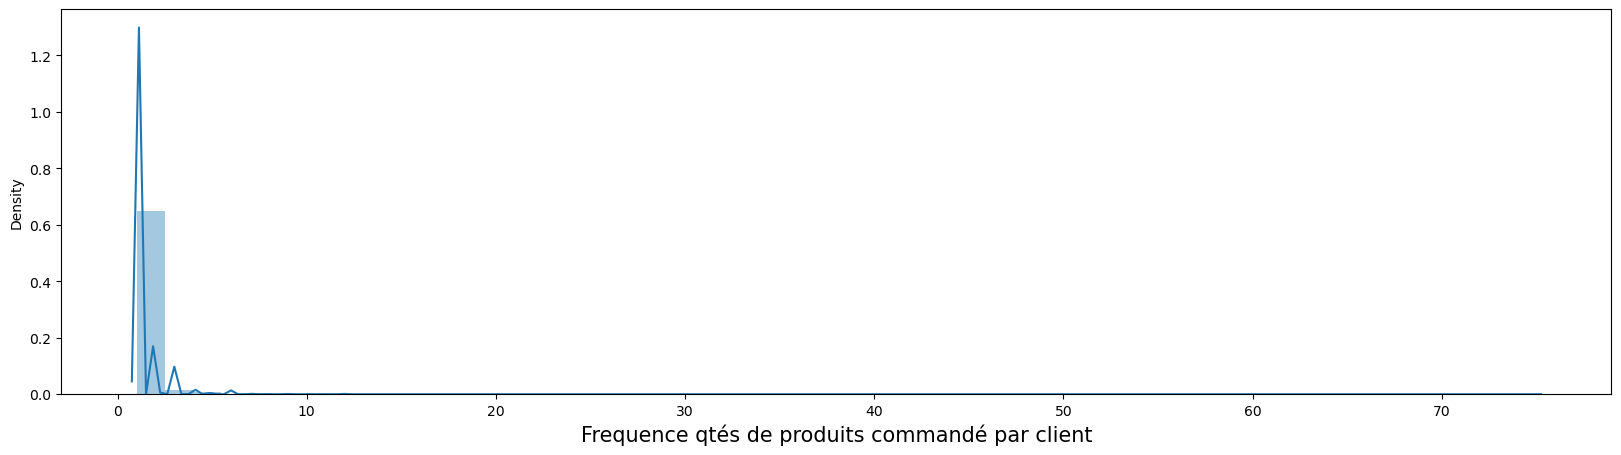

In [76]:
plt.figure(figsize=(20, 5))
sns.distplot(data.qtés)
plt.xlabel("Frequence qtés de produits commandé par client",
           color='k', fontsize=15)
plt.xticks(fontsize=10, color='k');

### Analyses bivariées

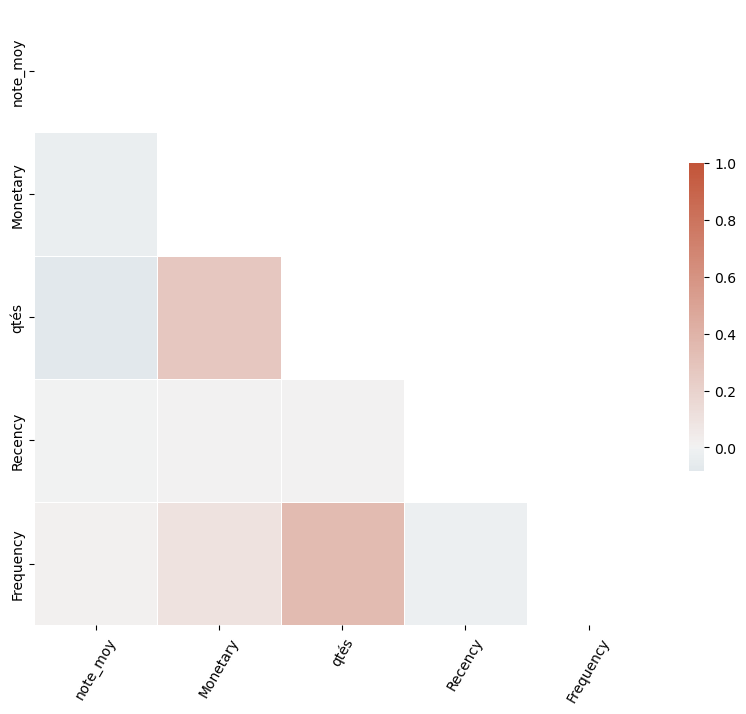

In [77]:
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.xticks(rotation=60);

In [66]:
data.groupby('Frequency').agg(note_moy=('note_moy', np.mean),
                              Moyenne_depensé=('Monetary', np.mean),
                              qtés_moyenne=('qtés', np.mean),
                              Recence_moyenne=('Recency', np.mean),
                              nb_clients=('Frequency', len))

,note_moy,Moyenne_depensé,qtés_moyenne,Recence_moyenne,nb_clients
Frequency,,,,,
1,4.152487,143.772819,1.184854,236.616220,89752
2,4.188364,257.436997,2.564204,220.843935,2531
3,4.418902,378.700747,4.017241,211.551724,174
4,4.446429,714.675357,5.821429,173.750000,28
5,4.300000,624.060000,5.666667,126.888889,9
6,4.666667,520.132000,8.200000,212.600000,5
7,5.000000,775.340000,10.333333,115.666667,3
9,2.777778,1000.850000,14.000000,183.000000,1
15,5.000000,714.630000,15.000000,9.000000,1


#### pourquoi l unique client avec une frequence de 9 a une note moyenne aussi basse ?

In [67]:
data[data.Frequency == 9]

,note_moy,Monetary,qtés,Recency,Frequency
customer_unique_id,,,,,
3e43e6105506432c953e165fb2acf44c,2.777778,1000.85,14,183,9


In [68]:
temp = order_items[order_items.customer_unique_id ==
                   '3e43e6105506432c953e165fb2acf44c'].groupby(
    'order_purchase_timestamp').agg(note_moy=('review_score', np.mean),
                                    Monetary=('price', np.sum))

temp

,note_moy,Monetary
order_purchase_timestamp,,
2017-09-18 18:53:15,2.0,67.60
2017-12-01 09:30:36,4.0,97.47
2017-12-01 22:37:41,3.0,50.00
2017-12-01 22:37:42,3.0,336.90
2018-01-11 10:56:15,3.0,119.00
2018-02-12 10:12:54,3.0,106.00
2018-02-12 10:12:55,3.0,53.99
2018-02-20 10:45:22,3.0,59.99
2018-02-27 18:36:39,1.0,109.90


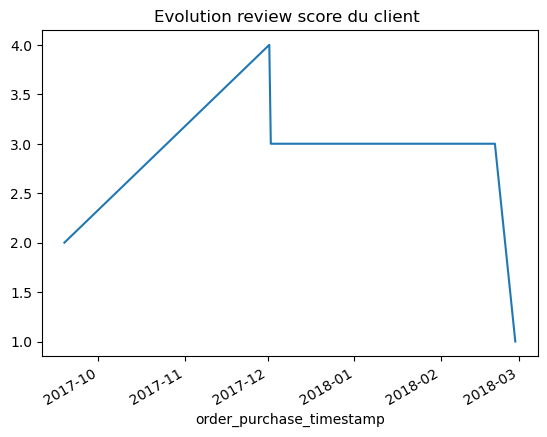

In [78]:
temp['note_moy'].plot(title='Evolution review score du client ');

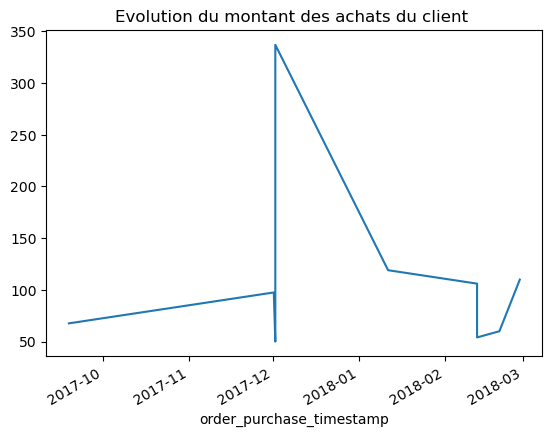

In [79]:
temp['Monetary'].plot(title='Evolution du montant des achats du client ');

#### Client exigeant ou malchanceux?

In [71]:
order_items[order_items.order_item_id > 1]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english,customer_id,order_status,...,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,review_score
14,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37,garden_tools,2355af7c75e7c98b43a87b2a7f210dc5,delivered,...,2018-03-06 00:00:00,9e4159995424971423b98c4a8bc11529,6600,jandira,SP,1.0,boleto,1.0,126.54,5.0
44,001ab0a7578dd66cd4b0a71f5b6e1e41,2,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63,electronics,8bb3bef4e75a95524235cdc11a7331af,delivered,...,2018-01-29 00:00:00,d1f24d1d504e27bee13b415e40daeab0,40055,salvador,BA,1.0,boleto,1.0,127.56,4.0
45,001ab0a7578dd66cd4b0a71f5b6e1e41,3,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63,electronics,8bb3bef4e75a95524235cdc11a7331af,delivered,...,2018-01-29 00:00:00,d1f24d1d504e27bee13b415e40daeab0,40055,salvador,BA,1.0,boleto,1.0,127.56,4.0
50,001d8f0e34a38c37f7dba2a37d4eba8b,2,e67307ff0f15ade43fcb6e670be7a74c,f4aba7c0bca51484c30ab7bdc34bcdd1,2017-05-18 17:35:11,18.99,7.78,health_beauty,d987da9fb4086ab7c2c0f83963cd6722,delivered,...,2017-05-24 00:00:00,870a0bdc769f9a7870309036740e79ea,2929,sao paulo,SP,1.0,credit_card,2.0,53.54,1.0
77,002c9def9c9b951b1bec6d50753c9891,2,2d9ff06c8870a518f5f6909774e140fb,00720abe85ba0859807595bbf045a33b,2018-05-21 17:32:03,78.00,8.90,housewares,06cf02bf583b05fd91bc8eec0f1b4c3f,delivered,...,2018-05-25 00:00:00,6bcc1cd0c7f8bffa6f67a6a1fbef5782,1255,sao paulo,SP,1.0,credit_card,1.0,173.80,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115005,ffecd5a79a0084f6a592288c67e3c298,3,50fd2b788dc166edd20512370dac54df,8b321bb669392f5163d04c59e235e066,2018-03-05 20:15:27,21.90,15.79,electronics,8afa5a415d65a08e3a68b1d7f9ddd8a5,delivered,...,2018-03-22 00:00:00,a969e99358a58bed2f4073fd04165a2b,41810,salvador,BA,1.0,credit_card,1.0,113.07,2.0
115023,fff8287bbae429a99bb7e8c21d151c41,2,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,2018-03-27 12:29:22,180.00,48.14,computers_accessories,6c1e92a209dbf868706caa831090941e,delivered,...,2018-04-19 00:00:00,028c09f007292c4e3a3b10d296e47987,58075,joao pessoa,PB,1.0,credit_card,4.0,456.28,5.0
115029,fffb9224b6fc7c43ebb0904318b10b5f,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19,watches_gifts,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,...,2017-11-27 00:00:00,f736308cd9952b33b90b9fe94da9c8f5,56912,serra talhada,PE,1.0,boleto,1.0,356.76,4.0
115030,fffb9224b6fc7c43ebb0904318b10b5f,3,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19,watches_gifts,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,...,2017-11-27 00:00:00,f736308cd9952b33b90b9fe94da9c8f5,56912,serra talhada,PE,1.0,boleto,1.0,356.76,4.0
